In [1]:

import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import defaultdict 




In [2]:
def remove_missing_data(df):
        for col in df.columns:
            try:
                df[col].replace({".": np.nan}, inplace=True)
            except Exception as e:
                print(e, "\n No missing values in", col)

        return df.dropna()


# Load data

In [6]:

# data_sets_xls = pd.ExcelFile("../data/Old data/demo_dub_sbj.xlsx")

data_sets_xls = pd.ExcelFile("../../datasets/demo.xlsx")

print(data_sets_xls.sheet_names)




['dyslexia', 'norm', 'risk']


In [9]:

    
data_sets = defaultdict(list)


for sheet in data_sets_xls.sheet_names:
    tmp =  pd.read_excel(data_sets_xls, sheet)
    tmp = remove_missing_data(df=tmp)
    tmp.replace({"fem": 1, "f": 1, "masc": 2, "m": 2}, inplace=True)
    tmp.replace({"norm": 1, "dyslexia":2, "risk": 3}, inplace=True)
    tmp = tmp.astype({
        "Group": str,
        "SubjectID": str,
        "Sex":int, 
        "Grade": int, 
        "Age": int, 
        "IQ": int, 
        "Reading_speed": float,
        "Sound_detection": float, 
        "Sound_change": float,
    })  

    data_sets[sheet] = tmp.sort_values(by=["SubjectID"]).dropna()

    print(sheet, tmp.shape)

    

dyslexia (72, 9)
norm (213, 9)
risk (22, 9)


## Remove the duplicated users from normal data


In [20]:


# duplicated_subjects = {'m29', 'm47', 's163', 's180'}


# tmp_norm = data_sets["norm"]

# norm_new = tmp_norm.loc[~tmp_norm.SubjID.isin(duplicated_subjects)]


# print(norm_new.shape, data_sets["norm"].shape)


# data_sets["norm"] = norm_new


# data_sets["norm"].shape


# with pd.ExcelWriter('../data/demo.xlsx') as writer:
#     for k, v in data_sets.items():
#         v.to_excel(writer, sheet_name=k, index=False)



## Remove users without sound_change and sound_detection

In [24]:



bad_subjects = {'russir25', 'russir28', 'russir29', 'russir32', 'russir37'}

all_subjects = set(data.SubjectID)


for i in bad_subjects:
    if i in all_subjects:
        print(i, "Should be removed!")

In [10]:
data_sets["norm"].head()

,Group,SubjectID,Sex,Grade,Age,IQ,Reading_speed,Sound_detection,Sound_change
0,1,10,1,4,10,23,102.0,0.62,0.91
1,1,108,1,4,10,34,139.0,1.00,0.95
2,1,11,2,4,10,34,110.0,1.00,0.79
3,1,11_norm1,1,2,9,28,71.0,0.95,0.91
4,1,12_norm1,2,2,8,32,60.0,0.95,0.62


In [11]:
data_sets["dyslexia"].head()

,Group,SubjectID,Sex,Grade,Age,IQ,Reading_speed,Sound_detection,Sound_change
0,2,ake05,1,3,9,35,38.0,0.958333,0.954545
1,2,asd17,2,4,10,34,57.0,0.875000,0.833333
2,2,bai24,2,1,7,28,6.0,0.708333,0.500000
3,2,eki26,1,1,8,35,6.0,0.750000,0.250000
4,2,fka11,2,2,9,32,48.0,0.833333,0.875000


In [12]:
data_sets["risk"].head()

,Group,SubjectID,Sex,Grade,Age,IQ,Reading_speed,Sound_detection,Sound_change
0,3,m107,1,2,9,36,50.0,1.00,0.75
1,3,m108,2,4,10,34,85.0,0.95,0.79
2,3,m25,1,6,12,36,85.0,0.91,0.58
3,3,m29,2,6,12,34,95.0,0.91,0.95
4,3,m46,2,4,10,35,82.0,0.95,0.83


In [13]:
data_dyslexia_cols = data_sets["dyslexia"].columns
data_norm_cols = data_sets["norm"].columns
data_risk_cols = data_sets["risk"].columns


In [14]:
set(data_dyslexia_cols == data_norm_cols)

{True}

In [15]:
set(data_norm_cols ==  data_risk_cols)

{True}

In [16]:

data = pd.concat([v for k, v in data_sets.items()], axis=0)
data.shape



(307, 9)

In [17]:
data.head()

,Group,SubjectID,Sex,Grade,Age,IQ,Reading_speed,Sound_detection,Sound_change
0,2,ake05,1,3,9,35,38.0,0.958333,0.954545
1,2,asd17,2,4,10,34,57.0,0.875000,0.833333
2,2,bai24,2,1,7,28,6.0,0.708333,0.500000
3,2,eki26,1,1,8,35,6.0,0.750000,0.250000
4,2,fka11,2,2,9,32,48.0,0.833333,0.875000


In [18]:
data.columns == data_dyslexia_cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [25]:

# pd.get_dummies(data, columns=["Sex"])



In [26]:
# dyslexia = data.loc[data["Group"]=="dyslexia"]

# dyslexia = data_sets["dyslexia"]

In [27]:
def plot_pies(data, col, labels):
    
    fig = plt.figure(figsize=(19, 13))

    ctr = 1
    for k, v in data.items():

        ax = fig.add_subplot(1, 3, ctr)  # three datasets
        x = [len(v[col].loc[v[col]==f]) for f in set(v[col])]
        if not labels:
            labels = set(v[col])
            patches, texts, autotexts = ax.pie(x=x, 
                                               labels=labels,
                                               autopct='%.2f', 
                                               textprops={'fontsize': 14},
                                              )
            labels = None
        else:   
            patches, texts, autotexts = ax.pie(x=x, 
                                               labels=labels, 
                                               autopct='%.2f', 
                                               textprops={'fontsize': 14}
                                              )
            
        plt.title(k, fontsize=20)
        ctr += 1
    plt.show()


    return None
    

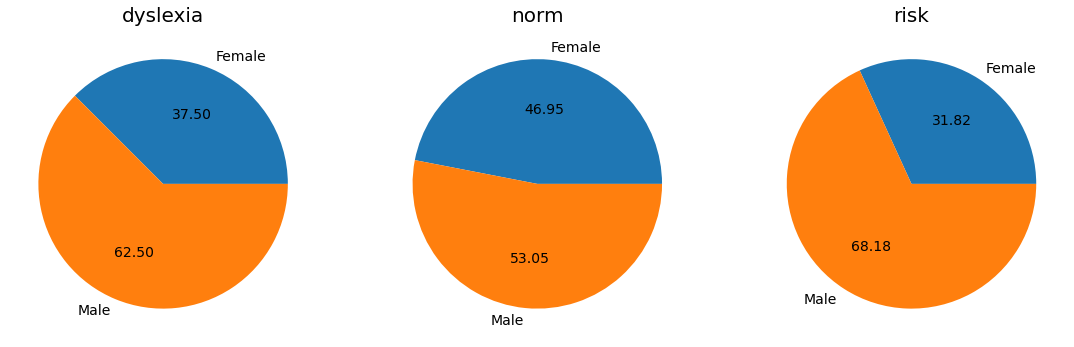

In [28]:

# Gender percentage: 
plot_pies(data=data_sets, col="Sex", labels=["Female", "Male"])





- the majority of participants are male, and the situation becomes more extreme in the at-risk dataset.




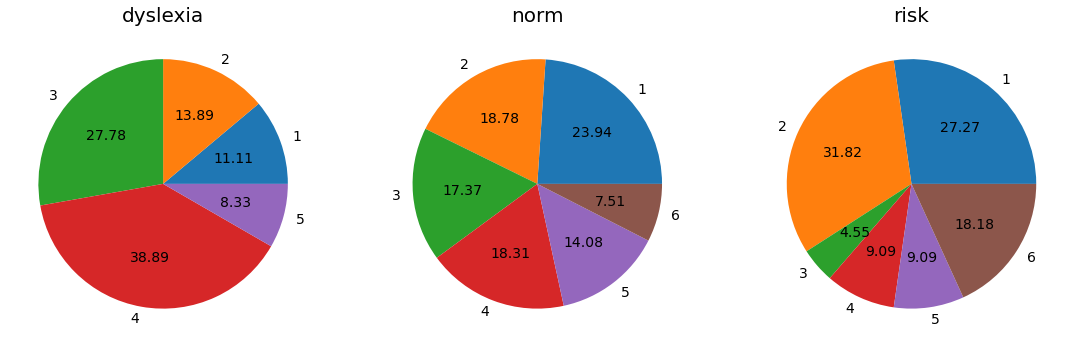

In [29]:

# Grages percentage:
plot_pies(data=data_sets, col="Grade", labels=None)




- Except for the normal dataset, the distribution of participants' grades is relatively imbalanced. 

    - This imbalanced representation may lead to a wrong correlation between the target values and the grades.
    
    

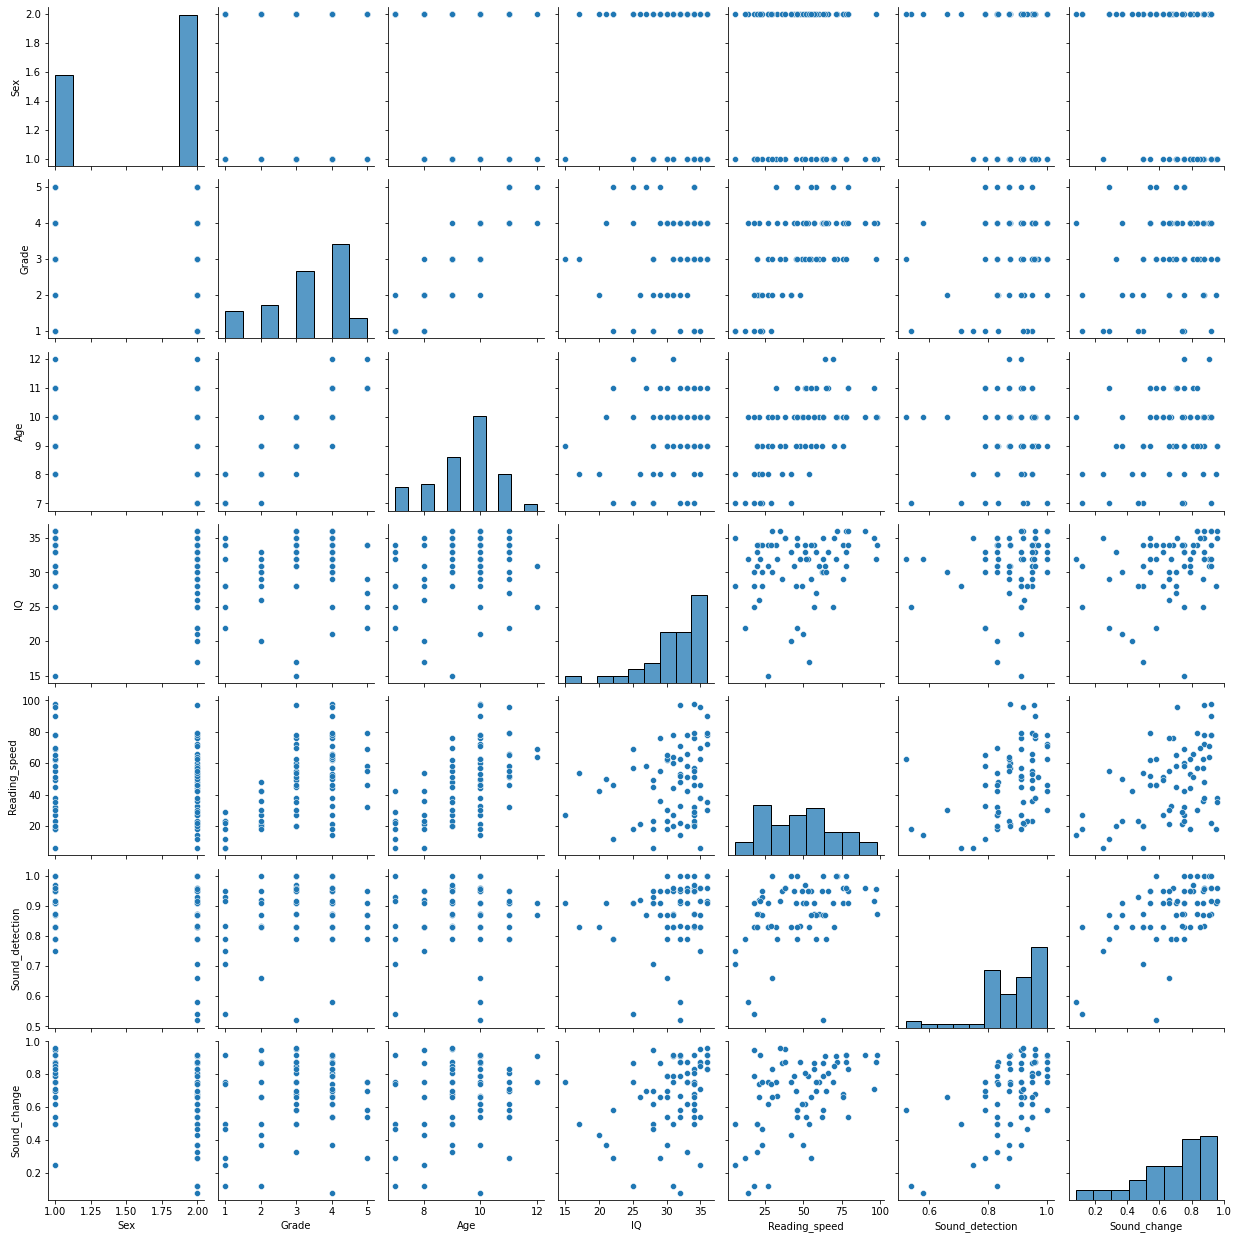

In [30]:

# Dyslexia pairplots:
sns.pairplot(data=data_sets["dyslexia"], )
plt.show()
    
    




- No **meaning-full** linear correlation between any features (age & grade)

- features distribution could be important 

- note the relation between grade and reading_speed, specially the wide range for grade 4.

- no such clear cut relation between grade and sound change as we observe in normal 

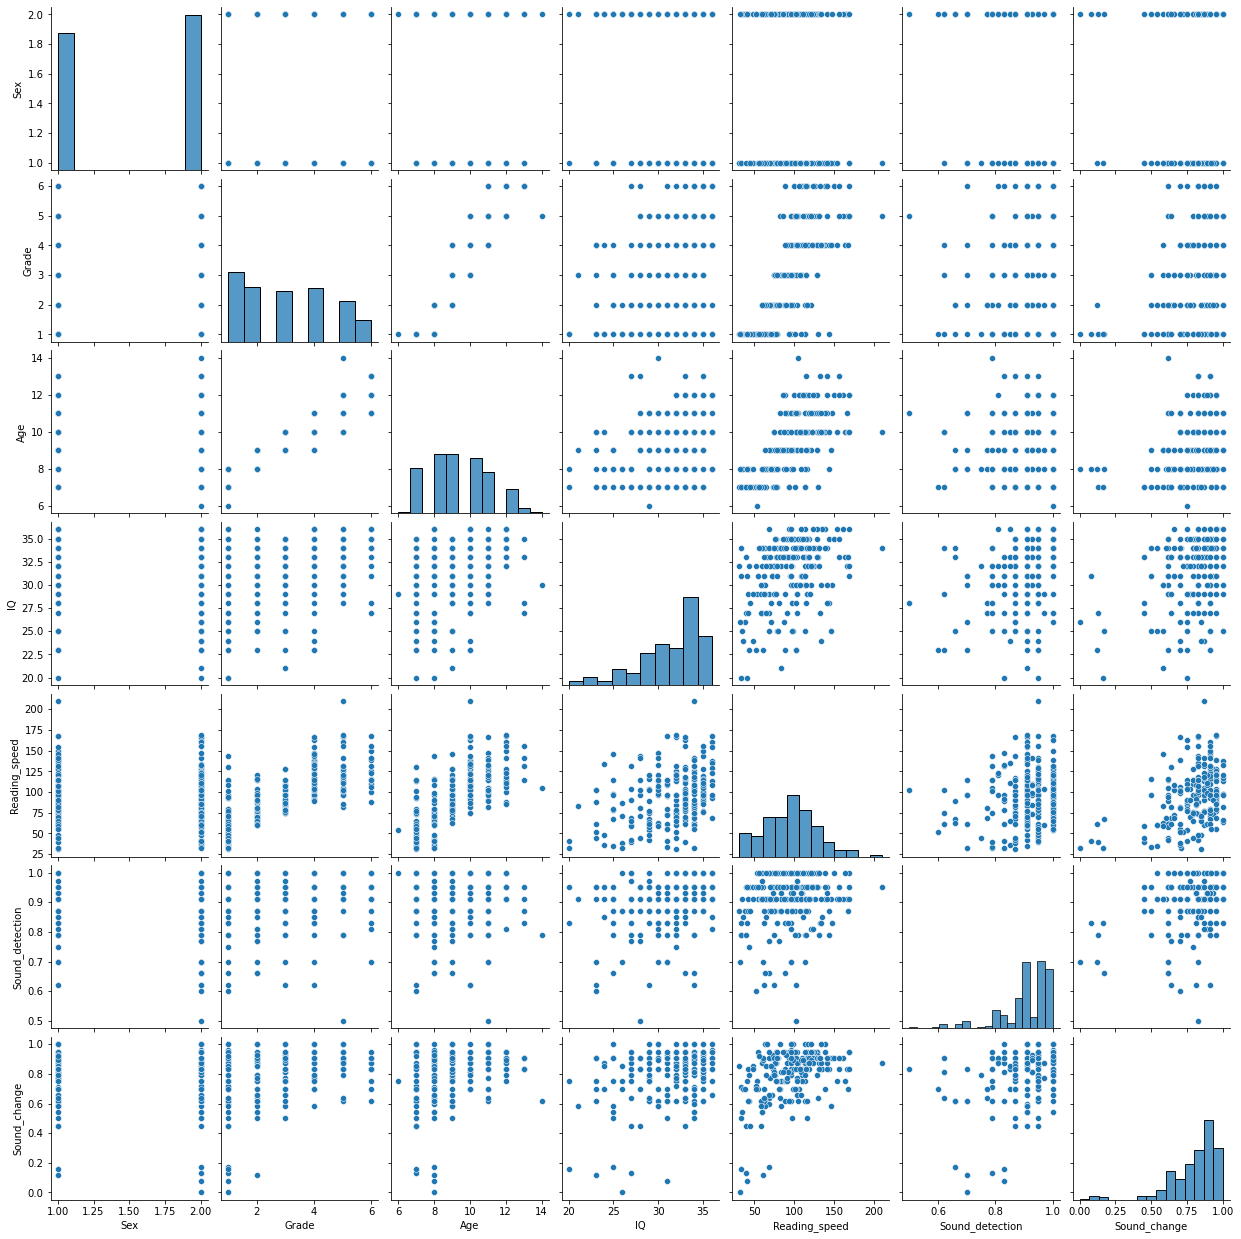

In [31]:

# Normal data pair-plots
sns.pairplot(data=data_sets["norm"], )
plt.show()





- No **meaning-full** linear correlation between any features (age & grade)

- Features distribution could be important 

- The higher the grade larger the sound change (unlike dyslexix) 


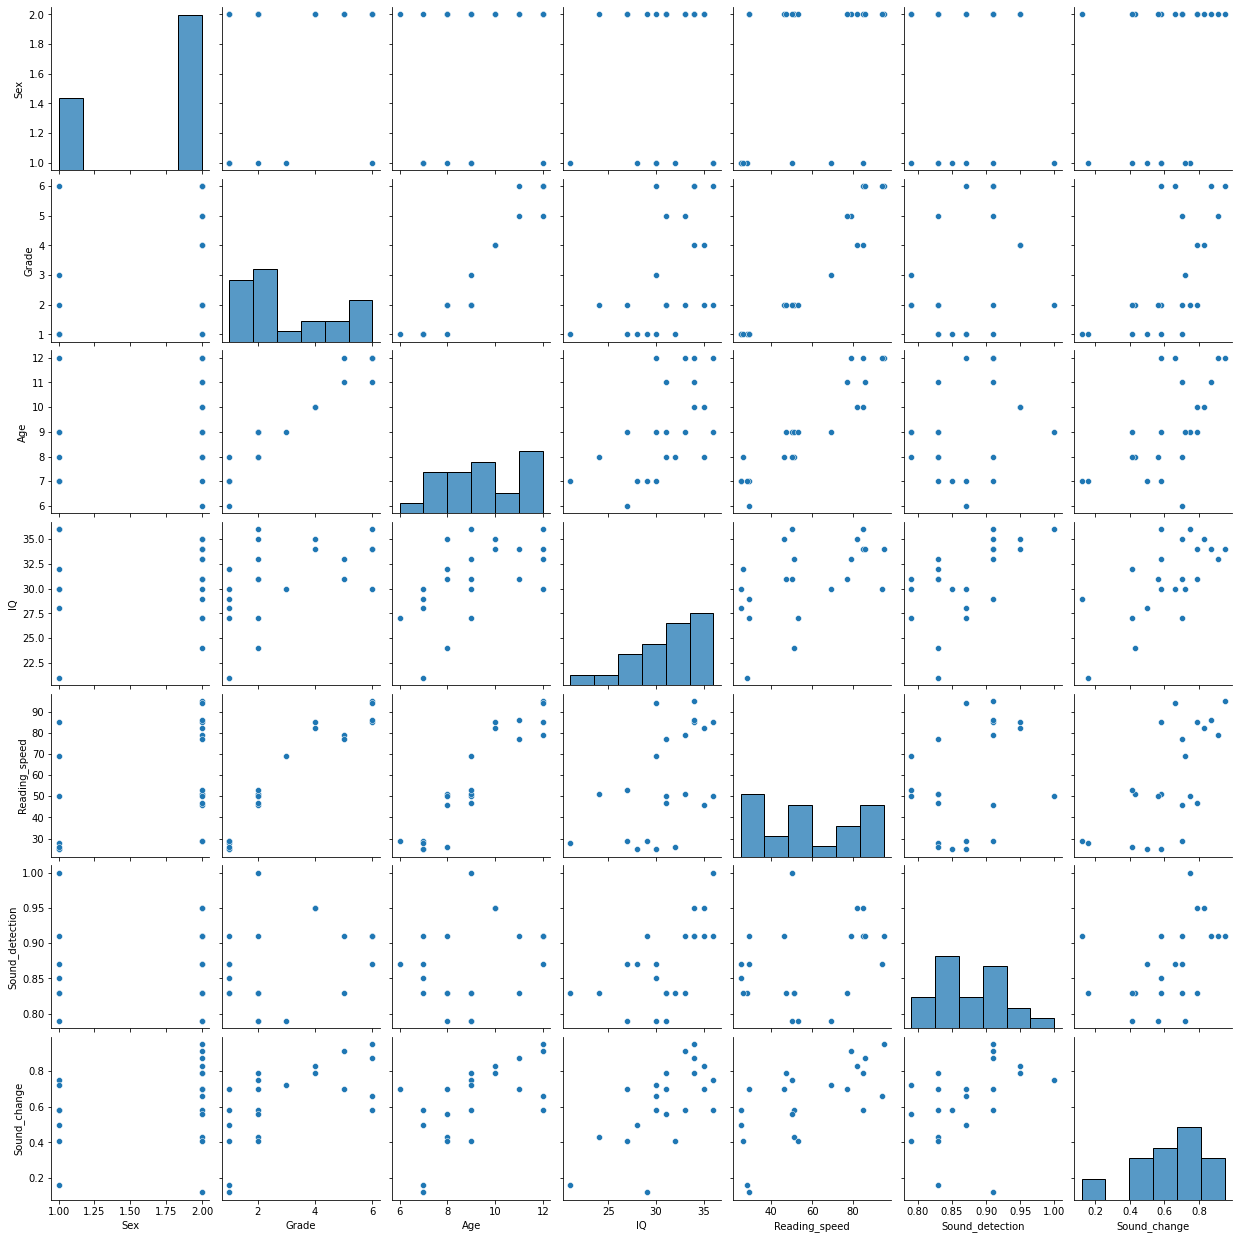

In [32]:


sns.pairplot(data=data_sets["risk"], )
plt.show()





- No **meaning-full** linear correlation between any features (age & grade)

- features distribution could be important 


